In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter('ignore')

In [2]:
train = pd.read_csv('kagg_train_titanic.csv')
test = pd.read_csv('kagg_test_titanic.csv')

In [3]:
train

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived,Age,SibSp,Parch,Fare
0,0,1,1,0,1,0,22.0,1,0,7.2500
1,0,0,0,0,0,1,38.0,1,0,71.2833
2,0,1,0,0,1,1,26.0,0,0,7.9250
3,0,0,0,0,1,1,35.0,1,0,53.1000
4,0,1,1,0,1,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...
884,1,0,1,0,1,0,27.0,0,0,13.0000
885,0,0,0,0,1,1,19.0,0,0,30.0000
886,0,1,0,0,1,0,28.0,1,2,23.4500
887,0,0,1,0,0,1,26.0,0,0,30.0000


In [4]:
test

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
0,0,1,1,1,0,34.5,0,0,7.8292
1,0,1,0,0,1,47.0,1,0,7.0000
2,1,0,1,1,0,62.0,0,0,9.6875
3,0,1,1,0,1,27.0,0,0,8.6625
4,0,1,0,0,1,22.0,1,1,12.2875
...,...,...,...,...,...,...,...,...,...
413,0,1,1,0,1,27.0,0,0,8.0500
414,0,0,0,0,0,39.0,0,0,108.9000
415,0,1,1,0,1,38.5,0,0,7.2500
416,0,1,1,0,1,27.0,0,0,8.0500


In [5]:
train['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [6]:
X = train.drop('Survived', axis =1)

In [7]:
y = train['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state= 101)

In [9]:
scaler = StandardScaler()

In [10]:
model = SVC(class_weight = 'balanced')

In [11]:
operations = [('scaler', scaler), ('model', model)]

In [12]:
pipe = Pipeline(operations)

In [13]:
param = {'model__C': [0.001,0.01,0.1,0.5,1],
         'model__gamma': ['scale', 'auto'],
         'model__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
         'model__degree': [2,3,4]}

In [14]:
grid_model = GridSearchCV(pipe, param_grid = param, cv = 5)

In [15]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        SVC(class_weight='balanced'))]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 0.5, 1],
                         'model__degree': [2, 3, 4],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [16]:
grid_model.best_params_

{'model__C': 0.5,
 'model__degree': 3,
 'model__gamma': 'scale',
 'model__kernel': 'poly'}

In [17]:
grid_pred = grid_model.predict(X_test)

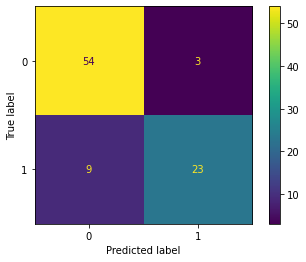

In [18]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

In [19]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        57
           1       0.88      0.72      0.79        32

    accuracy                           0.87        89
   macro avg       0.87      0.83      0.85        89
weighted avg       0.87      0.87      0.86        89



<Figure size 720x432 with 0 Axes>

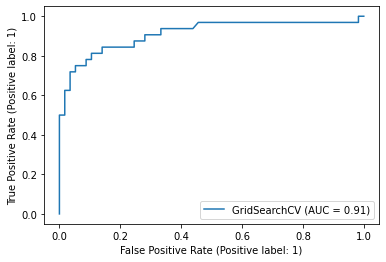

In [20]:
plt.figure(figsize = (10,6))
plot_roc_curve(grid_model, X_test, y_test)

In [21]:
svc_model =  SVC(C = 0.5, degree =3, gamma = 'scale', kernel =  'poly')

In [22]:
operation = [('scaler', scaler), ('svc_model', svc_model)]

In [23]:
pipe = Pipeline(operation)

In [24]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc_model', SVC(C=0.5, kernel='poly'))])

In [25]:
svc_pred = pipe.predict(test)

In [26]:
new = pd.read_csv('gender_submission.csv')

In [27]:
new['Survived'] = svc_pred

In [28]:
new.to_csv('kaggle_titanic2.csv')

In [29]:
new['Survived'] .value_counts()

0    305
1    113
Name: Survived, dtype: int64